In [1]:
import os
import re
import cmath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math
import cv2

from glob import glob
from collections import OrderedDict
from scipy.optimize import least_squares
from scipy.optimize import curve_fit

# Funciones

In [31]:
#Angulos del arctan2 de 0 a 2pi
def ajustar_angulo(angulo):
    # Convertir el ángulo a radianes si no lo está
    if isinstance(angulo, (int, float)):
        angulo = np.radians(angulo)
    
    # Ajustar el ángulo al rango [0, 2*pi]
    ajustado = angulo % (2 * np.pi)
    
    return ajustado

# Defino la función compleja

def onda_plana(X):

    return np.exp(1j*X)

def exponencial_compleja(p):

    return np.exp(1j*p)

def modulo_2pi(angle):
    
    # Aplicar el operador % para obtener el residuo de dividir el ángulo por 2π
    normalized_angle = angle % (2 * math.pi)
    
    # Multiplicar por 2π para asegurar que el resultado esté en el rango de 0 a 2π
    final_result = normalized_angle * (2 / math.pi)
    
    return final_result

def dat_im(dat):

    mod2pi=modulo_2pi(dat)
    normalized2gray=dat*(255/(2*np.pi))
    redondeado=np.round(normalized2gray,0)

    return redondeado
    

# Analisis

Text(0.5, 1.0, 'Fork con l=3 y d=3')

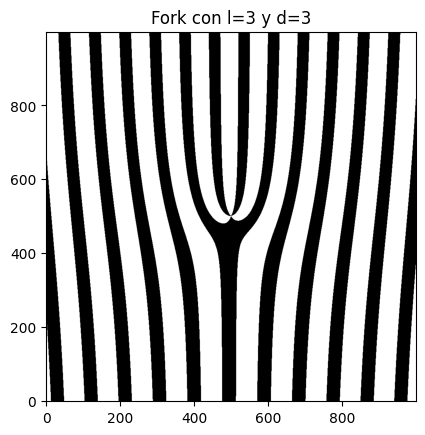

In [32]:
list_x=np.linspace(-3,3,1000)
list_y=np.linspace(-3,3,1000)

# Crear una cuadrícula de coordenadas
X, Y = np.meshgrid(list_x, list_y)

#variables
# l=1 ---> d=2 ; l=2 ---> d=0 ; l=3 ---> d=3
d=3
l=3
m=3
w=520*10**(-9)

k=(2*np.pi)/w

p=l*ajustar_angulo(np.arctan2(X,Y))+(np.pi/2)*d
r=np.sqrt(X**2+Y**2)

# Calcular Z como una función de X e Y

Z_plana = np.angle(onda_plana(k*X))
Z_helicoidal = np.angle(exponencial_compleja(p))

dat=np.angle(exponencial_compleja(p)*onda_plana(k*X))

Z = np.round(modulo_2pi(dat)*2/(2*np.pi),0)

np.savetxt('valores_Z.txt', Z, fmt='%.0f')

#Dibujar el trazado de contorno
titulo=f'Fork con l={l} y d={d}'

# plt.imshow(Z_plana, origin='lower', cmap='gray')
plt.imshow(Z, origin='lower', cmap='gray') 
# plt.contourf(X, Y, Z_helicoidal, levels=256, cmap='gray')
plt.title(titulo)